In [18]:
import numpy as np
import pandas as pd

from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [37]:
df = pd.read_csv("./data/signals.csv").drop("Unnamed: 0", axis = 1)
df = df.iloc[0:-1]
df["SOC1"] = df["SOC1"]*100
df["SOC2"] = df["SOC2"]*100
df["SOC3"] = df["SOC3"]*100

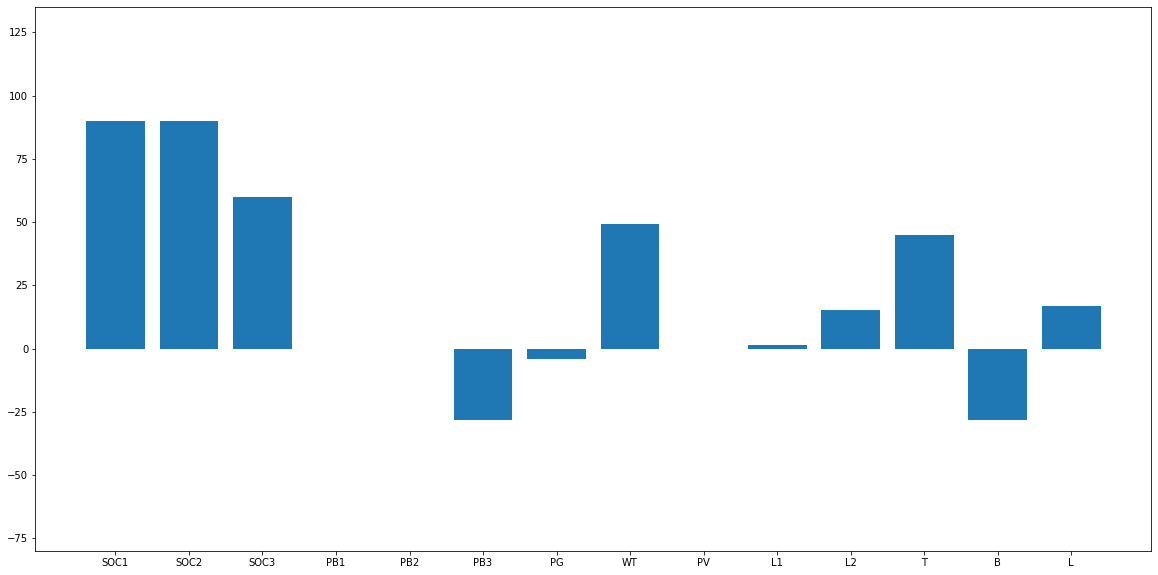

In [42]:
import time
for i in range(df.shape[0]):
    time.sleep(0.4)
    clear_output(wait=True)
    test = df.loc[i]
    plt.figure(figsize = (20, 10))
    plt.bar(test.index, test.values)
    plt.ylim([-80, 135])
    plt.show()

Index(['SOC1', 'SOC2', 'SOC3', 'PB1', 'PB2', 'PB3', 'PG', 'WT', 'PV', 'L1',
       'L2', 'T', 'B', 'L'],
      dtype='object')

In [63]:
import networkx as nx

In [292]:

class GraphViz():
    def __init__(self, figsize = (20, 10)):

        self.figsize = figsize
        self.font_size = sum(figsize)
        
        self.nodes = ["WT", "PV", "G", "T", "B", "L", "L1", "L2", "B1", "B2", "B3", " "]
        self.batteries = [("B1", "B", {"name": "PB1"}), ("B2", "B", {"name": "PB2"}), ("B3", "B", {"name": "PB3"})]
        self.topology = [("T", " ",{"name": "T"}), ("B", " ",{"name": "B"}), ("L", " ", {"name": "L"})]
        self.res = [ ("WT", "T",{"name": "WT"}), ("PV", "T",{"name": "PV"})]
        self.loads = [("L1", "L", {"name": "L1"}), ("L2", "L", {"name": "L2"})]
            
        self.G = nx.Graph()
        self.G.add_nodes_from(self.nodes)
        self.G.add_edges_from(self.batteries)
        self.G.add_edges_from(self.topology)
        self.G.add_edges_from(self.res)
        self.G.add_edges_from(self.loads)
        
        self.edges = self.G.edges()
        
        
        self.pos = nx.kamada_kawai_layout(G)
        
        self.edge_colors = ["k"]*n_edges
        self.weights = [2]*n_edges


    def update_edges(self, data):
        
        self.edge_colors = []
        self.weights = []
        
        edge_dict = nx.get_edge_attributes(self.G, "name")
        for edge, name in edge_dict.items():
            value = data[name]
            if value >= 0:
                self.edge_colors.append("pink")
            else:
                self.edge_colors.append("cyan")
                
            self.weights.append(np.ceil(abs(value)/5))
        
        colors = [G[u][v]['name'] for u,v in edges]
            
        
    def draw(self):
        plt.figure(figsize = self.figsize)
        nx.draw(G, pos, with_labels = True, edge_color= self.edge_colors, cmap="BrBG", width = self.weights, font_weight= True, font_size = self.font_size, node_size = 4000, node_color = "w")

        

In [293]:
g = GraphViz(figsize = (10, 5))

for i in range(0,df.shape[0], 6):
    clear_output(wait=True)
    datapoint = df.loc[i][3:]
    g.update_edges(datapoint)
    g.draw()
    plt.show()
    print("Time: {}.00".format(int(i/6)))
    print(datapoint)
    time.sleep(10)

KeyError: 'name'